<a href="https://colab.research.google.com/github/Varun1299/Spectral-Clustering/blob/master/Spectral.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import networkx as nx
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import math

In [0]:
G=nx.Graph()

In [0]:
G.add_edge(1,2, weight = 1)
G.add_edge(1,3, weight = 1)
G.add_edge(2,3, weight = 1)
G.add_edge(2,4, weight = 0.2)
G.add_edge(4,5, weight = 1)
G.add_edge(5,6, weight = 1)
G.add_edge(4,6, weight = 1)

In [4]:
G.nodes

NodeView((1, 2, 3, 4, 5, 6))

In [0]:
A = nx.adjacency_matrix(G)

In [6]:
print(A.todense())

[[0.  1.  1.  0.  0.  0. ]
 [1.  0.  1.  0.2 0.  0. ]
 [1.  1.  0.  0.  0.  0. ]
 [0.  0.2 0.  0.  1.  1. ]
 [0.  0.  0.  1.  0.  1. ]
 [0.  0.  0.  1.  1.  0. ]]


In [0]:
D = np.zeros((len(G.nodes), len(G.nodes)))  

In [8]:
indexer = 0
for node in G.nodes:
  D[indexer][indexer] = G.degree(node)
  indexer += 1
print(D)
print(G.degree(6))

[[2. 0. 0. 0. 0. 0.]
 [0. 3. 0. 0. 0. 0.]
 [0. 0. 2. 0. 0. 0.]
 [0. 0. 0. 3. 0. 0.]
 [0. 0. 0. 0. 2. 0.]
 [0. 0. 0. 0. 0. 2.]]
2


In [0]:
L = D - A

In [10]:
L

matrix([[ 2. , -1. , -1. ,  0. ,  0. ,  0. ],
        [-1. ,  3. , -1. , -0.2,  0. ,  0. ],
        [-1. , -1. ,  2. ,  0. ,  0. ,  0. ],
        [ 0. , -0.2,  0. ,  3. , -1. , -1. ],
        [ 0. ,  0. ,  0. , -1. ,  2. , -1. ],
        [ 0. ,  0. ,  0. , -1. , -1. ,  2. ]])

In [0]:
for rowidx in range(L.shape[0]):
  L[rowidx] = L[rowidx]/float(L[rowidx, rowidx])

In [12]:
L

matrix([[ 1.        , -0.5       , -0.5       ,  0.        ,  0.        ,
          0.        ],
        [-0.33333333,  1.        , -0.33333333, -0.06666667,  0.        ,
          0.        ],
        [-0.5       , -0.5       ,  1.        ,  0.        ,  0.        ,
          0.        ],
        [ 0.        , -0.06666667,  0.        ,  1.        , -0.33333333,
         -0.33333333],
        [ 0.        ,  0.        ,  0.        , -0.5       ,  1.        ,
         -0.5       ],
        [ 0.        ,  0.        ,  0.        , -0.5       , -0.5       ,
          1.        ]])

In [13]:
L.item((1,1))

1.0

In [0]:
eigvals,eigvecs = np.linalg.eig(L)

In [15]:

eigvecs

matrix([[-4.35194140e-01, -4.45629685e-01, -7.07106781e-01,
          3.23498320e-01,  3.03356177e-01, -1.11459175e-03],
        [-3.48155312e-01, -3.20668626e-01, -4.49559703e-15,
         -5.39163866e-01, -5.62094351e-01,  1.83111978e-16],
        [-4.35194140e-01, -4.45629685e-01,  7.07106781e-01,
          3.23498320e-01,  3.03356177e-01,  1.11459175e-03],
        [-3.48155312e-01,  3.20668626e-01, -2.06055195e-16,
         -5.39163866e-01,  5.62094351e-01, -2.66912227e-16],
        [-4.35194140e-01,  4.45629685e-01,  5.90229285e-17,
          3.23498320e-01, -3.03356177e-01, -7.07105903e-01],
        [-4.35194140e-01,  4.45629685e-01,  3.12673328e-17,
          3.23498320e-01, -3.03356177e-01,  7.07105903e-01]])

In [16]:
eigvals

array([0.1       , 0.14020729, 1.5       , 1.33333333, 1.42645938,
       1.5       ])

In [0]:
num_clusters = 2

In [0]:
selected_eigvecs = []
while len(selected_eigvecs) < num_clusters:
  idx = np.where(eigvals == min(eigvals))
  for i in idx[0]:
    selected_eigvecs.append(np.array(eigvecs[i])[0])
    if len(selected_eigvecs) == num_clusters:
      break
selected_eigvecs = np.array(selected_eigvecs)

In [19]:
nodes = []
for i in range(len(G.nodes)):
  nodes.append(selected_eigvecs[:, i])
nodes

[array([-0.43519414, -0.43519414]),
 array([-0.44562968, -0.44562968]),
 array([-0.70710678, -0.70710678]),
 array([0.32349832, 0.32349832]),
 array([0.30335618, 0.30335618]),
 array([-0.00111459, -0.00111459])]

In [0]:
kmeans = KMeans(n_clusters=2, init = 'k-means++').fit(nodes)

In [21]:
kmeans.labels_

array([0, 0, 0, 1, 1, 1], dtype=int32)

/usr/local/lib/python3.6/dist-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


<function matplotlib.pyplot.show>

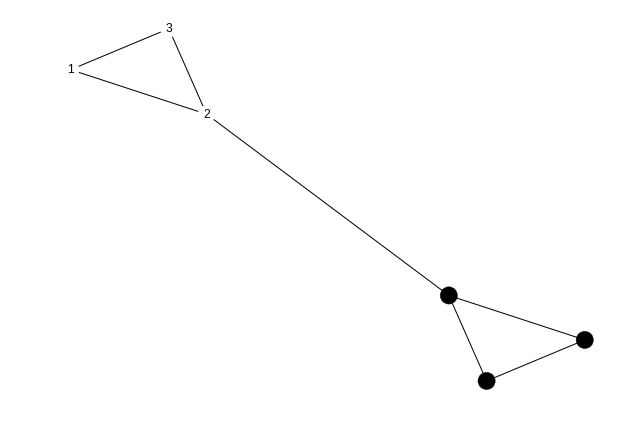

In [35]:
nx.draw(G, pos=nx.spring_layout(G), with_labels = True, node_color = kmeans.labels_)
plt.show